In [4]:
import pandas as pd
from ixplore import IXPLORE

In [ ]:
# Load reaction data (users × items matrix, values in {0, 1})
reactions = pd.read_csv('../data/binary_reactions.csv', index_col=0)

# Initialize and fit the model
model = IXPLORE(reactions, pca_initialization=True)

# Get user embeddings
embedding  = model.get_embedding()        # User positions (N × 2)
parameters = model.get_item_parameters()  # Item parameters (K × 3)

# Embed a new user based on their answers
new_user_answers = pd.Series({'Q1': 0.8, 'Q2': 0.2, 'Q3': 0.6}, name='new_user')
position = model.embed_new_user(new_user_answers)

# Predict all answers for a user
predicted = model.predict_all_answers(new_user_answers)

2026-02-13 16:02:52,724 - ixplore - INFO - Number of users for model: 250
2026-02-13 16:02:52,725 - ixplore - INFO - Number of items: 30
2026-02-13 16:02:52,725 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 16:02:52,726 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 16:02:52,729 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 16:02:52,729 - ixplore - INFO - Random state set to 0
2026-02-13 16:02:52,733 - ixplore - INFO - Initialized embedding with PCA.
2026-02-13 16:02:52,797 - ixplore - INFO - Fitted model parameters from embedding.


In [8]:
import numpy as np

model = IXPLORE(
    reactions,
    prior_mean=np.array([0, 0]),                # Prior center
    prior_cov=np.array([[0.1, 0], [0, 0.1]]),   # Prior covariance
    sampling_resolution=200,                    # Grid resolution for posteriors
    xlimits=(-1, 1),                            # X-axis bounds
    ylimits=(-1, 1),                            # Y-axis bounds
    pca_initialization=True,                    # Initialize with PCA
    random_state=17                             # For reproducibility
)

2026-02-13 16:03:43,681 - ixplore - INFO - Number of users for model: 250
2026-02-13 16:03:43,681 - ixplore - INFO - Number of items: 30
2026-02-13 16:03:43,682 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 16:03:43,683 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 16:03:43,686 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 16:03:43,687 - ixplore - INFO - Random state set to 17
2026-02-13 16:03:43,689 - ixplore - INFO - Initialized embedding with PCA.
2026-02-13 16:03:43,788 - ixplore - INFO - Fitted model parameters from embedding.


In [9]:
# Load pretrained embedding and model parameters
model = IXPLORE(
    reactions,
    pretrained_embedding='../data/synthetic_embedding.csv',
)

2026-02-13 16:03:55,889 - ixplore - INFO - Number of users for model: 250
2026-02-13 16:03:55,890 - ixplore - INFO - Number of items: 30
2026-02-13 16:03:55,890 - ixplore - INFO - Number of missing values: 0 (0.00%)
2026-02-13 16:03:55,891 - ixplore - INFO - Grid created with resolution 200x200, total 40000 points
2026-02-13 16:03:55,894 - ixplore - INFO - Prior set with mean [0 0] and covariance [0.1 0.  0.  0.1]
2026-02-13 16:03:55,895 - ixplore - INFO - Random state set to 0
2026-02-13 16:03:55,897 - ixplore - INFO - Pretrained embedding loaded from ../data/synthetic_embedding.csv
2026-02-13 16:03:55,897 - ixplore - INFO - Used pretrained embedding.
2026-02-13 16:03:55,956 - ixplore - INFO - Fitted model parameters from embedding.


2026-02-13 16:07:42,991 - ixplore - INFO - MAE: 0.09620293369435445, ACC: 0.9758666666666667


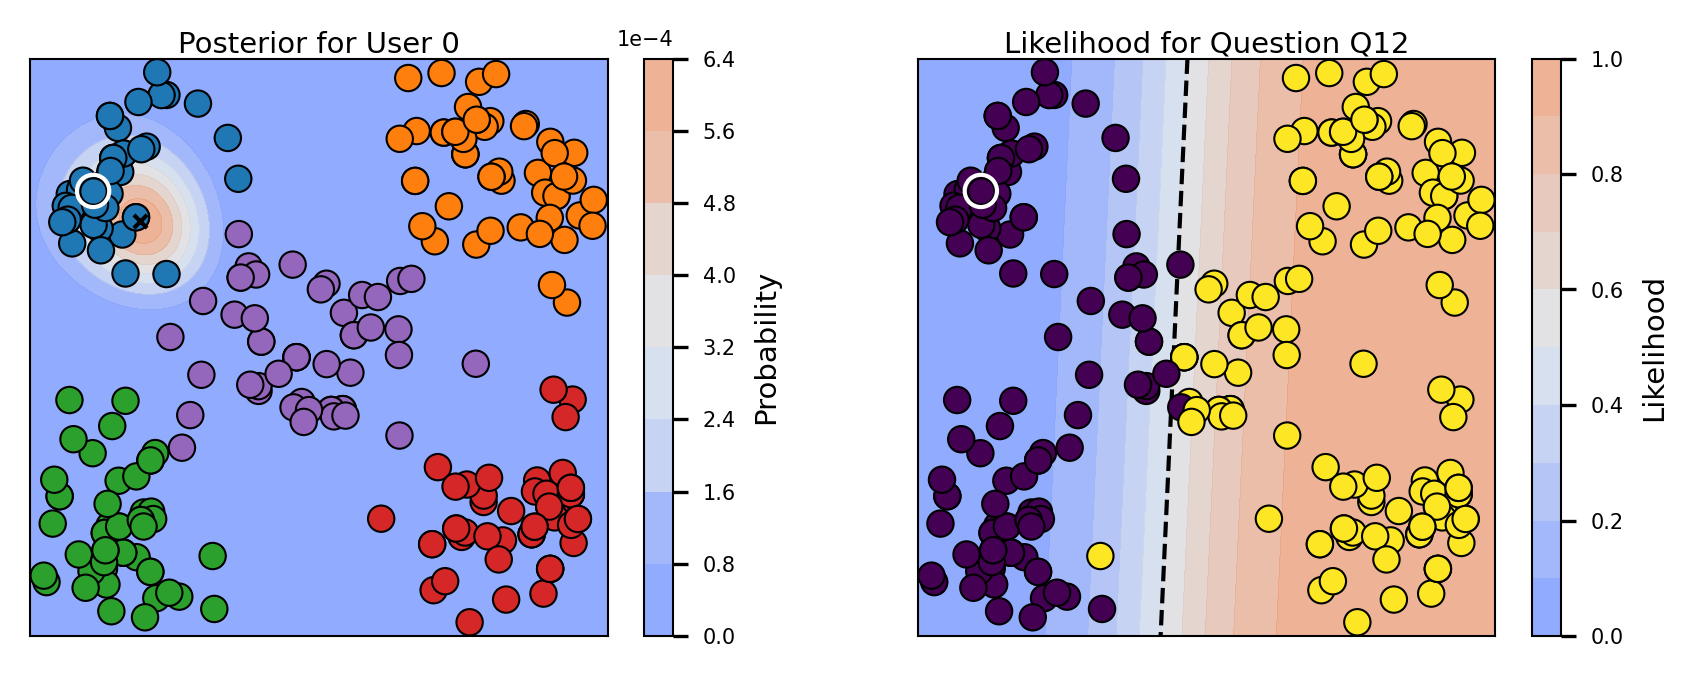

In [ ]:
from ixplore.visualization import plot_overview

# Load user metadata (e.g., colors for plotting)
users = pd.read_csv('../data/synthetic_users.csv', index_col=0)

# Plot user embeddings
plot_overview(model, n='0', q='Q12', colors=users.color, figsize=(7,2.5))